###INSTRUCTIONS:

Go to File -> Save a Copy in Drive and edit this notebook in your copy

Name the copy as : Name_RollNo_AssignmentNo

Put all your doubts on Whatsapp group.

try not to use chatgpt

In [ ]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as xp

Load data

In [ ]:
modi = pd.read_csv("modi_reviews.csv")
rahul = pd.read_csv('rahul_reviews.csv')

Display first 3 rows of dataset 1

In [ ]:
modi.head(3)

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...


In [ ]:
modi.shape

(25688, 3)

Display first 3 rows of dataset 2

In [ ]:
rahul.head(3)

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...


In [ ]:
rahul.shape

(14261, 3)

Testing sentiment of a tweet

In [ ]:
TextBlob(modi['Tweet'][0]).sentiment

Sentiment(polarity=0.35, subjectivity=0.36250000000000004)

In [ ]:
TextBlob(rahul['Tweet'][10]).sentiment

Sentiment(polarity=-0.3814697265625, subjectivity=0.375)

### Ensure the 'Tweet' column is of type string

In [ ]:
modi['Tweet'] = modi['Tweet'].astype(str)
rahul['Tweet'] = rahul['Tweet'].astype(str)

def find_polarity(review):
    return TextBlob(review).sentiment.polarity # Function to find polarity

### Apply polarity function

In [ ]:
modi['Polarity'] = modi['Tweet'].apply(find_polarity)
rahul['Polarity'] = rahul['Tweet'].apply(find_polarity)

In [ ]:
modi

,Unnamed: 0,User,Tweet,Polarity
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788
...,...,...,...,...
25683,25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,0.000000
25684,25684,SONUPINKOO,I am seriously worried about future of Indian ...,0.209524
25685,25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,-0.700000
25686,25686,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ...",0.000000


In [ ]:
rahul.head()

,Unnamed: 0,User,Tweet,Polarity
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667


### Assign labels based on polarity

In [ ]:
modi['Label'] = np.where(modi['Polarity'] > 0,'positive','negative')
modi['Label'][modi['Polarity']==0]='Neutral'

rahul['Label'] = np.where(rahul['Polarity'] > 0,'positive','negative')
rahul['Label'][rahul['Polarity']==0]='Neutral'

<ipython-input-53-c5ffdc2a1d63>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-c5ffdc2a1d63>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
rahul.head()

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750,positive
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000,Neutral
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000,Neutral
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000,positive
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667,negative


### Remove neutral tweets

In [ ]:
neutral_modi = modi[modi['Polarity']==0.0000]

remove_neutral_modi = modi['Polarity'].isin([0])
modi.drop(modi[remove_neutral_modi].index,inplace=True) #drop the neutral tweets
print(neutral_modi.shape)
print(modi.shape)

(8207, 5)
(17481, 5)


In [ ]:
neutral_rahul = rahul[rahul['Polarity']==0.0000]
remove_neutral_rahul = rahul['Polarity'].isin([0])
rahul.drop(rahul[remove_neutral_rahul].index,inplace=True)
print(neutral_rahul.shape)
print(rahul.shape)

(4894, 5)
(9367, 5)


In [ ]:
print(modi.shape)
print(rahul.shape)

(17481, 5)
(9367, 5)


### Balance the dataset

Make both the datasets of same shape. In order to achieve that, choose 9000 tweets at random from both the datasets

In [ ]:
#modi
np.random.seed(10) #ensures that the random numbers generated are the same every time the code is run
remove_n = 8481 #remove the extra rows remaining after selecting 9000 rows
drop_indices = np.random.choice(modi.index,remove_n,replace=False) #randomly choose rows to remove from dataset
df_modi = modi.drop(drop_indices)

In [ ]:
#rahul
np.random.seed(10)
remove_n = 367
drop_indices1 = np.random.choice(rahul.index,remove_n,replace=False)
df_rahul = rahul.drop(drop_indices1)

In [ ]:
print(df_modi.shape)
print(df_rahul.shape)

(9000, 5)
(9000, 5)


# prediction about indian election

### Calculate proportion of positive and negative tweets

In [ ]:
modi_count = df_modi.groupby('Label').size() #group the DataFrame by the 'Label' column and counts the occurrences of each label
neg_modi = (modi_count['negative'] / 9000) * 100 #calculate the percentage of positive and negative tweets
pos_modi = (modi_count['positive'] / 9000) * 100
neg_modi

28.888888888888886

In [ ]:
rahul_count = df_rahul.groupby('Label').size()
neg_rahul = (rahul_count['negative'] / 9000) * 100
pos_rahul = (rahul_count['positive'] / 9000) * 100

Represent the results using bar graphs

In [ ]:
politicians = ['Modi','Rahul']

neg_list = [neg_modi,neg_rahul]
pos_list = [pos_modi,pos_rahul]


fig = go.Figure(
data = [
    go.Bar(name='Negative',x=politicians,y=neg_list),
    go.Bar(name='Positive',x=politicians,y=pos_list)
]
)
fig.update_layout(barmode='group')
fig.show()

In [ ]:
modi_count

Label
negative    2600
positive    6400
dtype: int64

In [ ]:
rahul_count

Label
negative    3039
positive    5961
dtype: int64

Creating a histogram to show the distribution of polarity scores

In [ ]:
import plotly.express as px

fig = px.histogram(modi, x='Polarity', title='Distribution of Polarity Scores for Modi')
fig.show()

fig = px.histogram(rahul, x='Polarity', title='Distribution of Polarity Scores for Rahul')
fig.show()

###Creating a WordCloud

A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. It is a great way for visualizing unstructured text data and getting insights on trends and patterns.

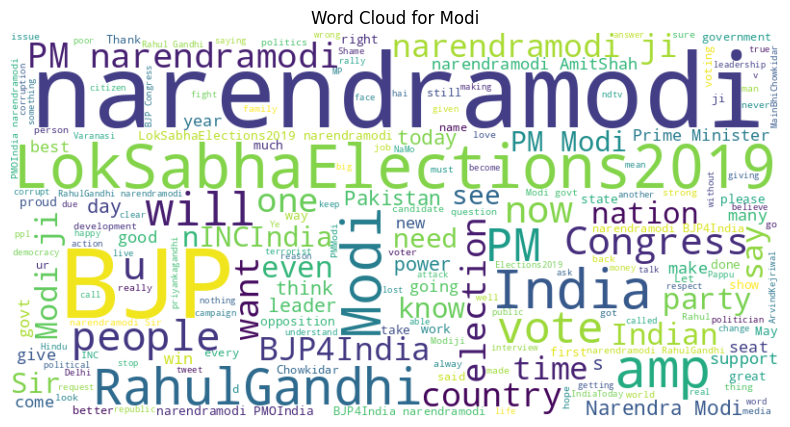

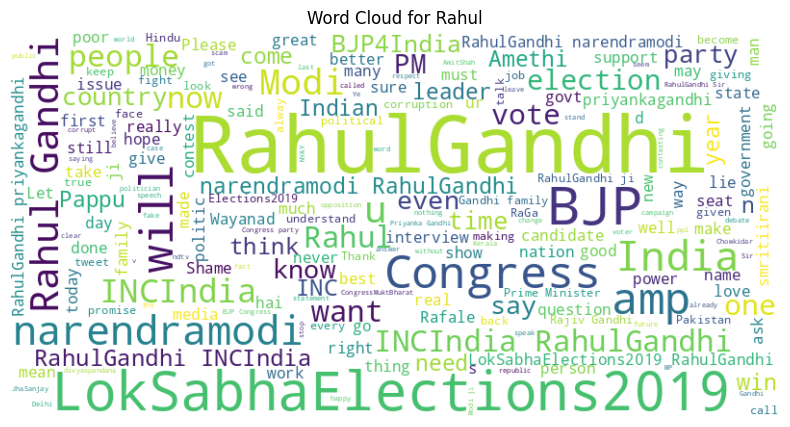

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for Modi
modi_text = ' '.join(modi['Tweet'])
modi_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(modi_text)

plt.figure(figsize=(10, 5))
plt.imshow(modi_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Modi')
plt.show()

# Word cloud for Rahul
rahul_text = ' '.join(rahul['Tweet'])
rahul_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(rahul_text)

plt.figure(figsize=(10, 5))
plt.imshow(rahul_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Rahul')
plt.show()
